<a href="https://colab.research.google.com/github/skumarudel/DSPS_SKumar/blob/master/HW8/HiggsBosonSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
#cd "/content/drive/MyDrive/KaggleStuff/"
#!mkdir HiggsBoson
#cd "/content/drive/MyDrive/KaggleStuff/HiggsBoson"
#!mkdir HiggsBoson


In [4]:
cd "/content/drive/MyDrive/KaggleStuff/HiggsBoson"

/content/drive/MyDrive/KaggleStuff/HiggsBoson


In [5]:
#!mkdir .kaggle 
!mv kaggle.json .kaggle/
!chmod 600 .kaggle/kaggle.json
!ls .kaggle

kaggle.json


In [6]:
import json
envs = json.load(open(".kaggle/kaggle.json", "r"))
import os
os.environ["KAGGLE_USERNAME"] = envs["username"]
os.environ["KAGGLE_KEY"] = envs["key"]

In [7]:
!pip install kaggle

In [8]:
#!kaggle competitions download -c higgs-boson

In [9]:
!ls

HiggsBosonCompetition_AMSMetric_rev1.py  test.zip
random_submission.zip			 training.zip


In [133]:
import pandas as pd
import json
import os
import pylab as pl
import pprint
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
df = pd.read_csv('training.zip', compression='zip')

In [12]:
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [13]:
df.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,1.437609,-0.128305,-708.985189,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,0.844743,1.193585,453.596721,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,-999.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,0.883000,-1.371000,-999.000000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,1.280000,-0.356000,-999.000000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,1.777000,1.225000,0.000000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


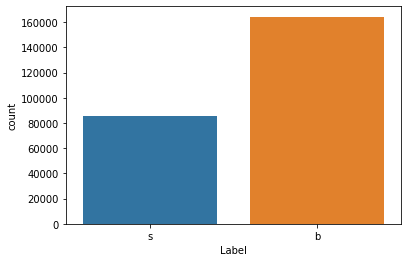

In [60]:
sns.countplot(x="Label", data=df);

plot shows the number of signal and background events in the sample. Clearly number of background events are almost twice the signal events.

In [14]:
pp = pprint.PrettyPrinter(width=41, compact=True)

In [15]:
# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state = 0)
print('Parameters currently in use:\n')
pp.pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


## Columns to use for training Decision tree algorithms

In [88]:
col_names = df.columns[1:-2]
col_names

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'],
      dtype='object')

In [17]:
X = df[col_names]
y = df.Label
le = LabelEncoder()
y = le.fit_transform(y)

## Splitting into train and test sets

In [18]:
X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=0.33, random_state=1)

## Test two different decision forest algorithms
- Random Forest
- Gradient Boosting

In [19]:
rf = RandomForestClassifier(random_state = 0)
gbt = GradientBoostingClassifier(random_state=6)
rf.fit(X_train,y_train)
gbt.fit(X_train,y_train)

GradientBoostingClassifier(random_state=6)

In [20]:
print("Accuracy score Random Forest train data = {:.3f}".format(accuracy_score(y_train, rf.predict(X_train))))
print("Accuracy score Random Forest test data = {:.3f}".format(accuracy_score(y_test, rf.predict(X_test))))

Accuracy score Random Forest train data = 1.000
Accuracy score Random Forest test data = 0.838


In [21]:
print("Accuracy score Gradient Boosting train data = {:.3f}".format(accuracy_score(y_train, gbt.predict(X_train))))
print("Accuracy score Gradient Boosting test data = {:.3f}".format(accuracy_score(y_test, gbt.predict(X_test))))

Accuracy score Gradient Boosting train data = 0.834
Accuracy score Gradient Boosting test data = 0.832


#### Clearly, the Random forest is overtraining that is why we are getting 100% accuracy on train data and 83% accurcy on test data. On the other hand, Gradient boosting although is performing poor as compared to Random forest on training data, but the error on training and testing data is same. That means it is atleast not overtraining. This is with the defaut settings comes with the package. In the next few sections we will try to explore the hyperparamters tuning in these algorithms

## Feature importance using Random Forest

In [34]:
data={'feature_names':col_names,'feature_importance':rf.feature_importances_}
fi_df = pd.DataFrame(data)
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
fi_df["cumulative"] = fi_df.feature_importance.to_numpy().cumsum()


In [39]:
fi_df.head(30)

,feature_names,feature_importance,cumulative
0,DER_mass_MMC,0.148537,0.148537
1,DER_mass_transverse_met_lep,0.107034,0.255571
2,DER_mass_vis,0.080126,0.335697
13,PRI_tau_pt,0.056585,0.392282
10,DER_pt_ratio_lep_tau,0.051233,0.443514
11,DER_met_phi_centrality,0.048080,0.491594
7,DER_deltar_tau_lep,0.046416,0.538010
19,PRI_met,0.038417,0.576427
3,DER_pt_h,0.032091,0.608518
9,DER_sum_pt,0.029686,0.638205


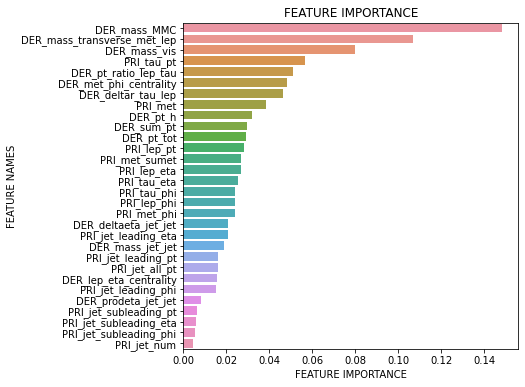

In [26]:
plt.figure(figsize=(6,6))
#Plot Searborn bar chart
sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
plt.title('FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES') ;

Above plot shows the percentage of feature importance in predicting the outcome. For example `DER_mas_MMC` feature has the maximum predictive power 

## Confusion matrix

### Random Forest

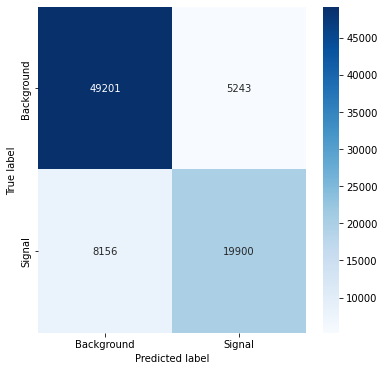

In [58]:
cm_rf = confusion_matrix(y_test, rf.predict(X_test))
fig,axes = plt.subplots(figsize=(6,6))
sns.heatmap(cm_rf,annot=True,cmap='Blues',ax=axes, fmt='.0f',cbar=True)
classNames = ['Background','Signal']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.array([0.5,1.5])
plt.xticks(tick_marks, classNames, rotation=0)
plt.yticks(tick_marks, classNames);

confusion matrix for random forest

### Gradient boosting

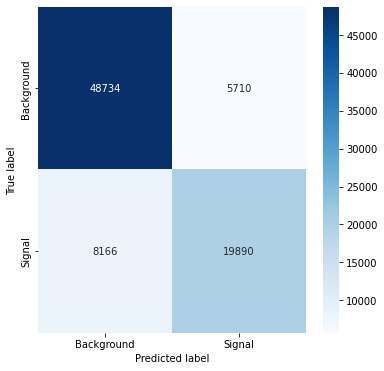

In [62]:
cm_gbt = confusion_matrix(y_test, gbt.predict(X_test))
fig,axes = plt.subplots(figsize=(6,6))
sns.heatmap(cm_gbt,annot=True,cmap='Blues',ax=axes, fmt='.0f',cbar=True)
classNames = ['Background','Signal']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.array([0.5,1.5])
plt.xticks(tick_marks, classNames, rotation=0)
plt.yticks(tick_marks, classNames);

confusion matrix for Gradient boosting

# Grid search for the best hyper parameters 

## First method only involves searching for tree depth and and number of trees.

In [65]:
all_aucs = {}
 
for depth in [3, 10, 20]:
    print('depth: %s' % depth)
    aucs = []
 
    for trees in [10,50,100,1000]:
        rf = RandomForestClassifier(n_estimators=trees,
              max_depth=depth, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_pred)
        print('%s -> %.3f' % (trees, auc))
        aucs.append(auc)
   
    all_aucs[depth] = aucs
    print()

depth: 3
10 -> 0.839
50 -> 0.854
100 -> 0.856
1000 -> 0.855

depth: 10
10 -> 0.894
50 -> 0.898
100 -> 0.899
1000 -> 0.900

depth: 20
10 -> 0.888
50 -> 0.903
100 -> 0.905
1000 -> 0.907



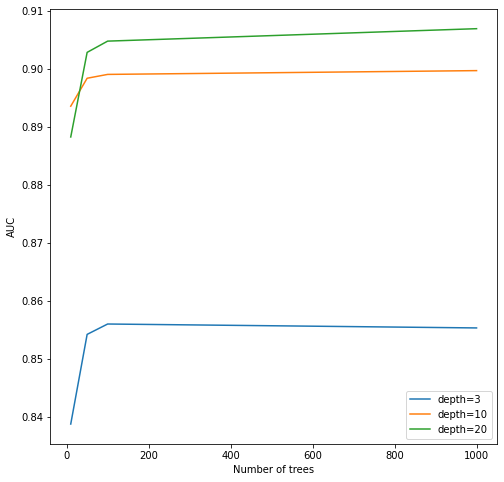

In [66]:
plt.figure(figsize=(8,8))
num_trees = np.array([10,50,100,1000])
plt.plot(num_trees, all_aucs[3], label='depth=3')
plt.plot(num_trees, all_aucs[10], label='depth=10')
plt.plot(num_trees, all_aucs[20], label='depth=20')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

plt.legend();

From the above figure, it is clear that the best performance is when max_depth=20 and Number of trees = 100

## Here I will use in build method in sklearn for best parameter search.

Hyperparameters to tune are
- max_depth
- n_estimators
- min_samples_leaf

In [73]:
distributions = {'max_depth': [10, 20, None],
 'max_features': ['sqrt', 'log2'], 'n_estimators': [50,100], 'min_samples_leaf':[int(0.001*len(y_train)), int(0.005*len(y_train)), int(0.05*len(y_train))]}

In [74]:
distributions

{'max_depth': [10, 20, None],
 'max_features': ['sqrt', 'log2'],
 'min_samples_leaf': [167, 837, 8375],
 'n_estimators': [50, 100]}

In [79]:
rf = RandomForestClassifier(random_state=0)
clf = RandomizedSearchCV(rf, distributions, random_state=5, n_iter=2, cv=3)

In [80]:
search = clf.fit(X_train, y_train)

In [81]:
search.best_estimator_

RandomForestClassifier(max_features='log2', min_samples_leaf=167,
                       random_state=0)

In [82]:
search.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 167,
 'n_estimators': 100}

In [83]:
rf_optimized = RandomForestClassifier(random_state=0, **search.best_params_)
print(rf_optimized)

RandomForestClassifier(max_features='log2', min_samples_leaf=167,
                       random_state=0)


In [84]:
rf_optimized.fit(X_train,y_train)

RandomForestClassifier(max_features='log2', min_samples_leaf=167,
                       random_state=0)

In [85]:
print("Accuracy score Random Forest train data = {:.2f}".format(accuracy_score(y_train, rf_optimized.predict(X_train))))
print("Accuracy score Random Forest test data = {:.2f}".format(accuracy_score(y_test, rf_optimized.predict(X_test))))

Accuracy score Random Forest train data = 0.83
Accuracy score Random Forest test data = 0.83


You can see, the overfitting problem is fixed by optimizng the hyperparameters

In [86]:
df_params = pd.DataFrame(clf.cv_results_)


In [87]:
df_params

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,35.681434,1.086964,0.909440,0.022273,100,167,log2,None,"{'n_estimators': 100, 'min_samples_leaf': 167,...",0.828653,0.825694,0.827539,0.827296,0.001220,1
1,5.784571,0.050514,0.231253,0.006038,50,8375,log2,20,"{'n_estimators': 50, 'min_samples_leaf': 8375,...",0.771698,0.775294,0.768990,0.771994,0.002582,2


# Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles

In [102]:
X_weight = df[col_names]
y_weight = df.Weight

### In regression it is always good idea to scale the parameters since we will be using distance in the loss function

In [103]:
X_scaled =  scale(X_weight)
y_scaled = scale(y_weight)

In [104]:
X_train_weight, X_test_weight, y_train_weight, y_test_weight =train_test_split(X_scaled, y_scaled,test_size=0.33, random_state=66)

### Hyperparameter tuning same way we did in classification

In [135]:
# Number of trees in random forest
n_estimators = list(np.arange(100,1001,200))
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = list(np.arange(20,120,20))
max_depth.append(None)
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'criterion': ["squared_error", "absolute_error"]}
               
pp.pprint(random_grid)

{'criterion': ['squared_error',
               'absolute_error'],
 'max_depth': [20, 40, 60, 80, 100,
               None],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [100, 300, 500, 700,
                  900]}


In [138]:
regr = RandomForestRegressor(random_state=0)
regr_random = RandomizedSearchCV(estimator = regr, param_distributions = random_grid, n_iter = 10, cv = 3, random_state=6, verbose=True)# Fit the random search model

## Was taking too much time, so i uploaded it

In [ ]:
clf_reg = regr_random.fit(X_train_weight, y_train_weight)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


---

<h1 style="color:red"> Awesome ! only forgot to do the last part, generated an output file as required and report kaggle results</h1>
